In [2]:
from __future__ import print_function
from datahandling import access_db
from data_processing_pipeline import equip_dtypes_for_scoring
from tinydb import Query, TinyDB
from matplotlib.pyplot import plot, figure, ylim, xlim, ylabel, xlabel
from model_analysis import translate_model_code
from numpy import argmax
from no_big_db_func import get_all_names
from pandas import DataFrame
% matplotlib inline

C:\Users\Reinhard\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
names = get_all_names()

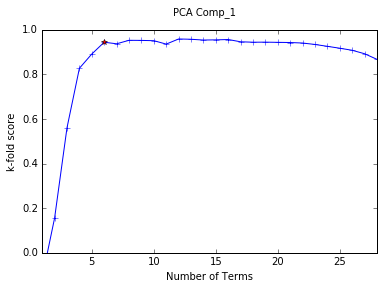

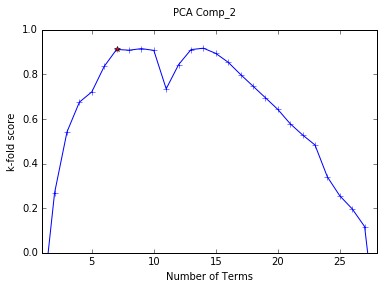

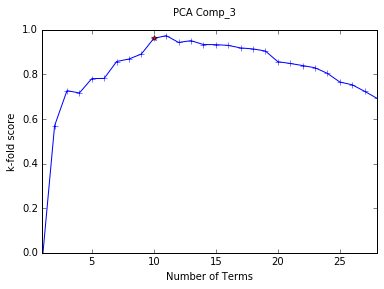

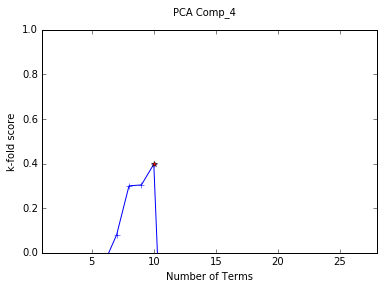

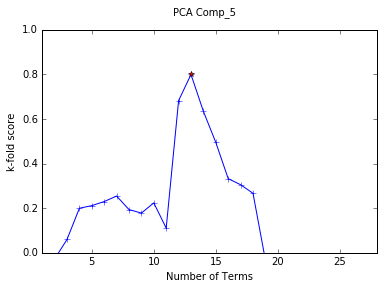

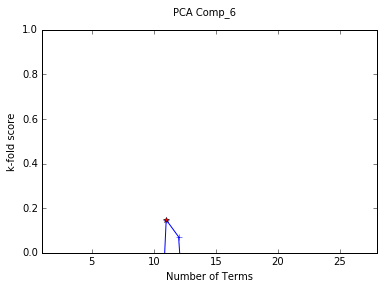

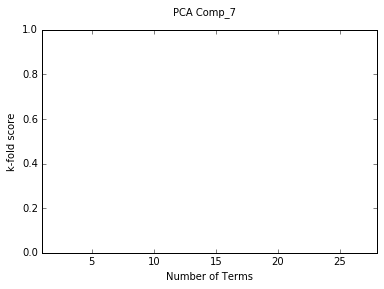

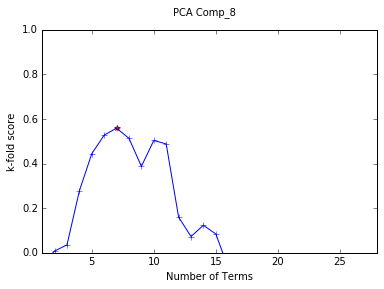

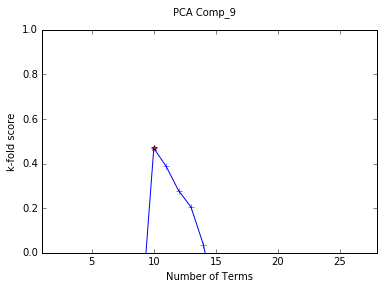

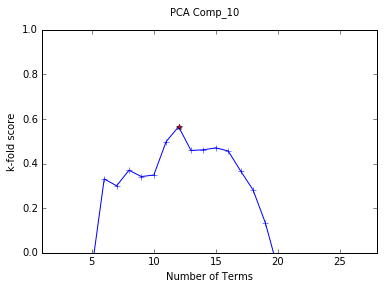

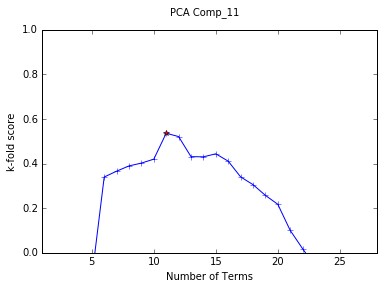

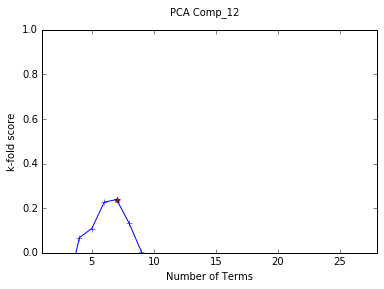

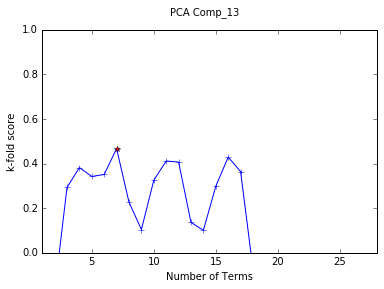

In [4]:
Q = Query()
use_lim = True

for i in names:
    equip, d_type = i.split(' ')
    
    top_db = access_db('Top_score_results_'+ equip + '_' + d_type, False)
               
    df = DataFrame(top_db.all())
    
    n_terms = list(df['n_terms'].values)
    scores = list(df['top_score'].values)
    mcodes = list(df['top_mcode'].values)
    
    max_score = max(scores)
    
    
    if use_lim:
        lim = max_score - (abs(max_score*5/105))

        for s in scores:
            if s > lim:
                select_score = s
                break
    else:
        select_score = max_score
            
    ind = scores.index(select_score)
    top_score_model = mcodes[ind]
    
    t_mc = translate_model_code(top_score_model)
    
    fig = figure()
    plot(n_terms, scores, '-+')
    ylim([0.0, 1.0])
    ylabel('k-fold score')
    xlim([1.0, 28.0])
    xlabel('Number of Terms')
    
    plot(n_terms[ind], scores[ind], 'r*')
    
    fig.suptitle(i)
    
#     fig.suptitle('Best Model: (' + t_mc + ') for ' + i)
